In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import os
print(os.listdir("../input"))



['heart.csv']


In [2]:
data =pd.read_csv("../input/heart.csv")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
data.head()

In [ ]:
data.columns

In [78]:
print(data['target'].value_counts(dropna =False))

1    165
0    138
Name: target, dtype: int64


In [ ]:
data.describe()

In [ ]:
data.corr()

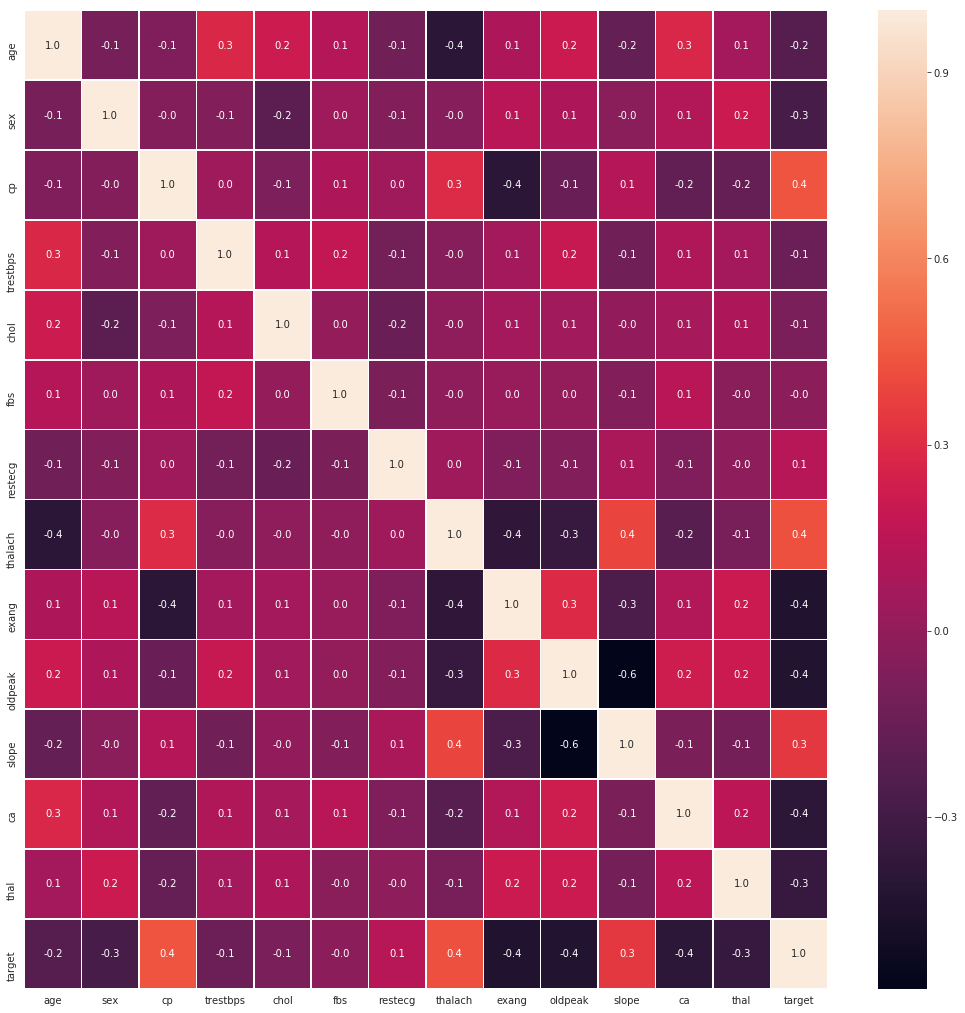

In [79]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [80]:
outlierlower_thalach = 133.5-1.5*(166-133.5)
print('outlierlower_thalach =',outlierlower_thalach)

outlierupper_thalach = 166+1.5*(166-133.5)
print('outlierupper_thalach =',outlierupper_thalach)

outlierlower_thalach = 84.75
outlierupper_thalach = 214.75


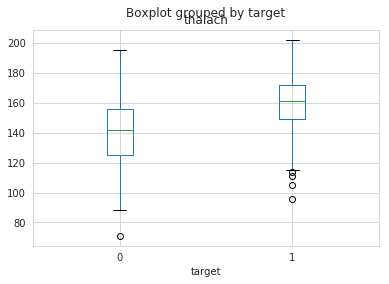

In [81]:
data.boxplot(column='thalach',by = 'target')


In [82]:
data[(data['target']==1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 14 columns):
age         165 non-null int64
sex         165 non-null int64
cp          165 non-null int64
trestbps    165 non-null int64
chol        165 non-null int64
fbs         165 non-null int64
restecg     165 non-null int64
thalach     165 non-null int64
exang       165 non-null int64
oldpeak     165 non-null float64
slope       165 non-null int64
ca          165 non-null int64
thal        165 non-null int64
target      165 non-null int64
dtypes: float64(1), int64(13)
memory usage: 19.3 KB


In [83]:
data[(data['target']==1)].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [84]:
outlierlower_thalach1 = 149-1.5*(172-149)
print('outlierlower_thalach1 =',outlierlower_thalach1)

outlierupper_thalach1 = 172+1.5*(172-149)
print('outlierupper_thalach1 =',outlierupper_thalach1)

outlierlower_thalach1 = 114.5
outlierupper_thalach1 = 206.5


In [85]:
data[(data['thalach']<114.5) & (data['target']==1)].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1


In [86]:
data['thalach'] = data['thalach'].astype('float')

In [87]:
data.drop([17,95,136,139], axis=0, inplace=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 302
Data columns (total 14 columns):
age         299 non-null int64
sex         299 non-null int64
cp          299 non-null int64
trestbps    299 non-null int64
chol        299 non-null int64
fbs         299 non-null int64
restecg     299 non-null int64
thalach     299 non-null float64
exang       299 non-null int64
oldpeak     299 non-null float64
slope       299 non-null int64
ca          299 non-null int64
thal        299 non-null int64
target      299 non-null int64
dtypes: float64(2), int64(12)
memory usage: 35.0 KB


In [75]:
data[(data['target']==1)].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [ ]:
outlierlower_thalach2 = 159-1.5*(172-150)
print('outlierlower_thalach2 =',outlierlower_thalach2)

outlierupper_thalach2 = 172+1.5*(172-150)
print('outlierupper_thalach2 =',outlierupper_thalach2)

In [ ]:
data.boxplot(column='thalach',by = 'target')

In [ ]:
data.boxplot(column='cp',by = 'target')

In [ ]:
data.boxplot(column='slope',by = 'target')

The most powerful correlations  cp target, target thalach, thalach slope between.

In [ ]:
data.plot(kind='scatter', x='thalach', y='slope',alpha = 0.5,color = 'red')
plt.xlabel('thalach')              # label = name of label
plt.ylabel('slope')
plt.title('thalach slope Scatter Plot')  

when the slope is 1 the most thalach values 110 170 between in all value
when the slope is 2 the most thalach values 130 190 between in all value

In [ ]:
data.plot(kind='scatter', x='target', y='cp',alpha = 0.5,color = 'red')
plt.xlabel('target')              # label = name of label
plt.ylabel('cp')
plt.title('target cp Scatter Plot')  

there is probability of heart disease in all values of cp

In [ ]:
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)]

In [ ]:
data1= data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].head()
data2= data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =False) # axis = 0 : adds dataframes in row
conc_data_row

In [ ]:
data1 = data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)]['age']
data2= data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)]['sex']
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

In [ ]:
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].info()

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].plot(kind = "hist",y = "cp",bins = 50,normed = True,ax = axes[0])
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].plot(kind = "hist",y = "cp",bins = 50,normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].plot(kind = "hist",y = "slope",bins = 50,normed = True,ax = axes[0])
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].plot(kind = "hist",y = "slope",bins = 50,normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].plot(kind = "hist",y = "thalach",bins = 50,normed = True,ax = axes[0])
data[(data['slope']>=1) & (data['thalach']>100) & (data['target']==1)].plot(kind = "hist",y = "thalach",bins = 50,normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

people with heart disease with slope 2, thalach 160, cp 2 when I interpret all the graphs

In [9]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [10]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [62]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T


In [13]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 83.61%


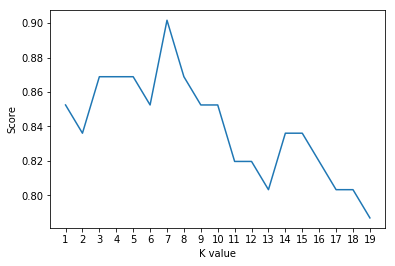

Maximum KNN Score is 90.16%


In [14]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

In [17]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test.T,y_test.T)*100))

Test Accuracy of SVM Algorithm: 81.97%


In [20]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test.T,y_test.T)*100))

Accuracy of Naive Bayes: 85.25%


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree Test Accuracy 73.77%


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

Random Forest Algorithm Accuracy Score : 85.25%


In [34]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [35]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [36]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [37]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [38]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [39]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))

iteration: 100
cost: 0.37966533849933537


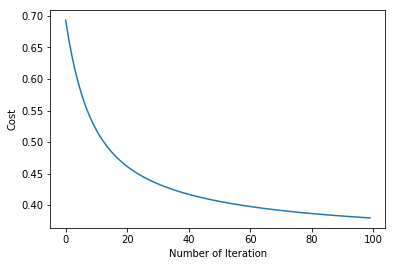

Manuel Test Accuracy: 81.97%


In [40]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

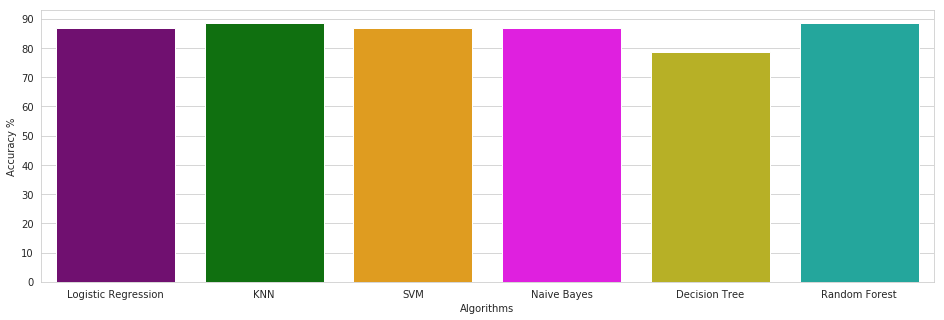

In [41]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [86.89, 88.52, 86.89, 86.89, 78.69, 88.52]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()